## Numerical solution of ordinary differential equations: Higher order Runge-Kutta methods

As always, we start by importing some important Python modules.

In [1]:
import numpy as np
from numpy import pi
from numpy.linalg import solve, norm    
import matplotlib.pyplot as plt
    

# Use a funny plotting style
# plt.xkcd()
newparams = {'figure.figsize': (6.0, 6.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

### Runge-Kutta Methods
In the previous lectures we introduced
*Euler's method* and *Heun's method* as
particular instances of the *One Step Methods*,
and we presented the general error theory
for one step method.

In this note we will consider one step methods which go under the name
**Runge-Kutta methods (RKM)**. We will see that Euler's method
and Heun's method are instance of RKMs.
But before we start, we will derive yet another one-step method,
known as *explicit midpoint rule* or
*improved explicit Euler method*.

As for Heun's method, we start from the IVP $y' = f(t, y)$,
integrate over $[t_k, t_{k+1}]$ and
apply the midpoint rule:

$$
y(t_{k+1}) - y(t_k)
= \int_{t_k}^{t_{k+1}} f(t, y(t)){\,\mathrm{d}t}
$$

$$
\approx \tau_k f(t_k + \tfrac{1}{2}\tau_k, y(t_k + \tfrac{1}{2}\tau_k))
$$

Since we cannot determine the value $y(t_k + \tfrac{1}{2}\tau_k)$ from this system,
we borrow an idea from derivation of Heun's method and approximate
it using a half explicit Euler step

$$
y(t_k + \tfrac{1}{2}\tau_k) \approx
y(t_k + \tfrac{1}{2}\tau_k f(t_k, y(t_k)),
$$

leading to the following one-step methods.

Given $y_k, \tau_k$ and $f$, compute

$$
y_{k+1} := y_k + \tau_k f(t_k + \tfrac{1}{2}\tau_k, y_k + \tfrac{1}{2}\tau_k f(t_k, y_k)).
$$(eq:improved_euler)

The nested function expression can again be rewritten using 2 *stage
derivatives*, which leads to the following form of the
**explicit midpoint rule** or
**improved explicit Euler method**:

$$
k_{1} := f(t_k, y_k)
$$

$$
k_{2} := f(t_k + \tfrac{\tau_k}{2}, y_k + \tfrac{\tau_k}{2} k_1)
$$

$$
y_{k+1} := y_k + \tau_k k_2
$$

:::{exercise} Analyzing the improved explicit Euler method
:label: ode:exe-improved-ex-euler

**a)**
Find the increment function $\Phi$ for the improved explicit Euler method.

**b)**
Assuming the right-hand side $f$ of a given IVP satisfies a Lipschitz
condition $\| f(t, y) - f(t, z)\| \leqslant M \| y-z\| $ with a
constant $L_f$ independent of $t$, show that the incremement function
$\Phi$ of the improved Euler method does also satisfies a Lipschitz
condition for some constant $L_{\Phi}$.

**Hint.**
Get some inspiration from the corresponding result for Heun's method derived
in `ErrorAnalysisNuMeODE` notes.


**c)**
Show the improved explicit Euler method is consistent of order $2$
if the right-hand side $f$ of a given IVP is in $C^2$.


**Hint.**
Get some inspiration from the corresponding result for Heun's method derived
in `ErrorAnalysisNuMeODE` notes.

:::

:::{solution} ode:exe-improved-ex-euler
:class: dropdown

**a)** 

$$
\Phi(t_k,
y_{k},
\tau_{k})
=
f\left(t_{k} + \frac{\tau}{2}, y_k + \frac{\tau}{2}f(t_k,y_k)\right).
$$

**b)**
Using the increment function above, the Lipschitz condition for $f$, the triangle inequality and then the Lipschitz condition for $f$ again we get the following: 
\begin{align*}
|\Phi(t,y)-\Phi(t,z)| &= |f\left(t + \frac{\tau}{2}, y + \frac{\tau}{2}f(t,y)\right) - f\left(t + \frac{\tau}{2}, z + \frac{\tau}{2}f(t,z)\right)| 
\\ 
&\leq M| y + \frac{\tau}{2}f(t,y) - z - \frac{\tau}{2}f(t,z) |
\\ 
&\leq M| y - z  | + M\frac{\tau}{2} | f(t,y) - f(t,z) |
\\ 
&\leq M| y - z  | + M^2\frac{\tau}{2} | y-z |
\\ 
& = (M+\frac{\tau}{2}M^2)|y-z|.
\end{align*}


Assuming that the step size $\tau$ is bounded upward by some $\tau_0$,
we can conclude that

$$
|\Phi(t,y)-\Phi(t,z)| \leq L_{\Phi}|y-z|, \qquad L_{\Phi}=M+\frac{\tau_0}{2}M^2.
$$

**c)**
As before, we have the following for the exact solution: 
$$
y(t_0+\tau) = y_0 + \tau f + \frac{\tau^2}{2}(f_t + f_y f) +
\frac{\tau^3}{6}(f_{tt}+2f_{ty}f+f_{yy}ff + f_yf_xf + f_yf_t+ (f_y)^2f
) + \dotsm,
$$

where $f$ and all its derivatives are evaluated in $(t_0,y_0)$.

For the numerical solution we get


\begin{align*}
  k_1 &= f(t_0,y_0) = f, 
  \\ 
  k_2 &= f(t_0+\frac{\tau}{2}, y_0+\frac{\tau}{2} k_1) 
  \\ 
      & = f + \frac{\tau}{2} f_t + f_y\frac{\tau}{2} k_1 + \frac{1}{8}f_{tt}\tau^2 + f_{ty}\frac{\tau^2}{4} k_1 + \frac{1}{8}f_{yy}\tau^2 k_1^2 
       + \dotsm 
       \\ 
      &= f + \frac{\tau}{2}(f_t + f_yf) + \frac{\tau^2}{8}(f_{tt} + 2f_{ty}f + f_{yy}f^2) + \dotsm
      \\ 
  y_1 &=  \tau k_2
\end{align*}


and the local truncation error will be

$$
\eta(t_0, \tau) = y(t_0+\tau)-y_1 = \frac{\tau^3}{24}(-f_{tt}-2f_{ty}f-f_{yy}f^2 + 4f_yf_t + 4(f_y)^2f) + \dotsm
$$


:::

Recall that the **explicit Euler method** is defined by

$$
k_{1} := f(t_k, y_k)
$$

$$
y_{k+1} := y_k + \tau_k  k_1
$$

And **Heun's method** or **explicit trapezoidal rule** is similar to the improved explicit Euler method given by

$$
k_{1} := f(t_k, y_k)
$$

$$
k_{2} := f(t_k + \tau_k, y_k + \tau_k k_1)
$$

$$
y_{k+1} := y_k + \tau_k ( \tfrac{1}{2} k_1  + \tfrac{1}{2} k_2 ) 
$$

Note that for all schemes so far, we are able to successively compute the stage derivatives,
starting from $k_1 = f(t_k, y_{k})$.

This is not the case for the last one-step method we encountered so far,
namely the **implicit trapezoidal rule** or **Crank-Nicolson method**:

$$
y_{k+1} := y_k + \tau_k (\tfrac{1}{2} \underbrace{f(t_k, y_k)}_{:=k_1} + \tfrac{1}{2}
\underbrace{f(t_k+\tau_k, y_{k+1}))}_{:= k_2}
$$

Using stage derivatives, we obtain this time

$$
k_{1} := f(t_k, y_k)
$$

$$
k_{2} := f(t_k + \tau_k, y_{k} + \tau (\tfrac{1}{2}k_1 + \tfrac{1}{2} k_2)) 
$$

$$
y_{k+1} := y_k + \tau_k ( \dfrac{1}{2} k_1  + \dfrac{1}{2} k_2 ) 
$$

The previous examples and the wish for constructing higher ($> 2$) one-step methods
leads to following definition

:::{prf:definition}
:label: def:runge-kutta

Given $b_j$, $c_j$, and $a_{jl}$ for $j,l = 1,\ldots s$, the Runge-Kutta method is
defined by the recipe

\begin{align}
k_{j} &:=
f(t_k + c_j \tau, y_i +  \tau_k \sum_{l=1}^{s} {a}_{jl} k_l)
\quad
j = 1,\ldots s,
\\
y_{k+1} &:= y_{k} + \tau_k \sum_{j=1}^s b_j k_j
\end{align}
:::

Runge-Kutta schemes are often specified in the form of a **Butcher table**:

$$
\begin{array}{c|ccc}
c_1 & a_{11} & \cdots & a_{1s}
\\ 
\vdots & \vdots & & \vdots
\\ 
c_s & a_{s1} & \cdots & a_{ss}
\\ 
\hline
& b_1 & \cdots & b_s
\end{array}
$$

If $a_{ij} = 0$ for $j \geqslant i$ the Runge-Kutta method is called **explicit**
as the stages $k_i$ are defined explicitly and can be computed successively:

$$
k_1 := f(t_k + c_1 \tau_k, y_k)
$$

$$
k_2 := f(t_k + c_2 \tau_k, y_k + \tau_k a_{21} k_1)
$$

$$
k_3 := f(t_k + c_3 \tau_k, y_k + \tau_k a_{31} k_1 + \tau a_{32} k_2)
$$

$$
\vdots 
$$


$$
k_j := f(t_k + c_j \tau_k, y_k + \tau_k \sum_{l=1}^{j-1} a_{jl} k_l)
$$

$$
\vdots 
$$

$$
k_s := f(t_k + c_s \tau_k, y_k + \tau_k \sum_{l=1}^{s-1} a_{sl} k_l)
$$

$$
y_{k+1} := y_{k} + \tau \sum_{j=1}^s b_j k_j
$$

:::{exercise} Butcher tables for some well-known Runge-Kutta methods
:label: ode:exe-butcher-tables

Write down the Butcher table for the
1. explicit Euler

2. Heun's method (explicit trapezoidal rule)

3. Crank-Nicolson (implicit trapezoidal rule)

4. improved explicit Euler method (explicit midpoint rule)

and go to "www.menti.com" and take the quiz.


$$
\boldsymbol{\mathrm{A})}
\quad
\begin{array}{c|c c}
0 & 0 & 0
\\ 
\tfrac{1}{2} & \tfrac{1}{2} & 0
\\ 
\hline
& 0 & 1
\end{array}
\qquad
\boldsymbol{\mathrm{B})}
\quad
\begin{array}{c|c}
0 & 0
\\ 
\hline
& 1
\end{array}
\qquad
\boldsymbol{\mathrm{C})}
\quad
\begin{array}{c|cc}
0 & 0 & 0 \\ 1 & 1 & 0 \\ \hline & \frac{1}{2} & \frac{1}{2} 
\end{array}
\qquad
\boldsymbol{\mathrm{D})}
\quad
\begin{array}{c|cc}
0 & 0 & 0 \\ 1 & \dfrac{1}{2} & \dfrac{1}{2} \\ \hline & \frac{1}{2} & \frac{1}{2} 
\end{array}
$$

:::

:::{solution} ode:exe-butcher-tables

The correct pairing is
1. explicit Euler:  $\textbf{B)}$

2. Heun's method (explicit trapezoidal rule):  $\textbf{C)}$

3. Crank-Nicolson (implicit trapezoidal rule): $\textbf{D)}$

4. improved explicit Euler method (explicit midpoint rule): $\textbf{A)}$


:::

We show a verbose solution for explicit Euler, improved explicit Euler and Crank-Nicolson.

**Explicit Euler method**: Since we have only one stage derivative,
this is an example of a 1-stage Runge-Kutta method (s=1). Looking
at the definition of the stage and the final step, we see that

$$
k_{1} := f(t_k, y_k) = f(t_k + \underbrace{0}_{c_1} \cdot \tau_k, y_k + \tau_k \underbrace{0}_{a_{11}} \cdot k_1) \Rightarrow c_1 = a_{11} = 0
$$

$$
y_{k+1} := y_k + \tau_k k_1 =  y_k + \tau_k \underbrace{1}_{b_1}\cdot k_1 \Rightarrow  b_1 = 1
$$

Thus, the Butcher table is

$$
\boldsymbol{\mathrm{B})}
\quad
\begin{array}{c|c}
0 & 0
\\ 
\hline
& 1
\end{array}
$$

**Improved explicit Euler method**: Since we have to stage derivatives,
this is an example of a 2-stage Runge-Kutta method (s=2). Looking
at the definition of the stages and the final step, we see that

$$
k_{1} := f(t_k, y_k) = f(t_k + \underbrace{0}_{c_1} \cdot \tau_k, y_k + \tau_k \underbrace{0}_{a_{11}} \cdot k_1 + \tau_k \underbrace{0}_{a_{21}} \cdot k_2) \Rightarrow c_1 = a_{11} = a_{21} = 0
$$

$$
k_{2} := f(t_k + \tfrac{\tau_k}{2}, y_k + \tfrac{\tau_k}{2} k_1)
$$

$$
      \phantom{:}= f(t_k + \underbrace{\tfrac{1}{2}}_{c_2}\tau_k, y_k + \tau_k\underbrace{\tfrac{1}{2}}_{a_{21}} \cdot k_1 + \tau_k \underbrace{0}_{a_{22}} \cdot k_2) \Rightarrow c_2 = \tfrac{1}{2}, a_{21} = \tfrac{1}{2}, a_{22} = 0
$$

$$
y_{k+1} := y_k + \tau_k k_2 =  y_k + \tau_k \underbrace{0}_{b_1}\cdot k_1  \tau_k \underbrace{1}_{b_2} \cdot k_2 \Rightarrow  b_1 = 0, b_2 = 1
$$

Thus, the Butcher table is

$$
\boldsymbol{\mathrm{A})}
\quad
\begin{array}{c|c c}
0 & 0 & 0
\\ 
\tfrac{1}{2} & \tfrac{1}{2} & 0
\\ 
\hline
& 0 & 1
\end{array}
$$

**Crank-Nicolson method**: Since we have to stage derivatives,
this is an example of a 2-stage Runge-Kutta method (s=2). Looking
at the definition of the stages and the final step, we see that

$$
k_{1} := f(t_k, y_k) = f(t_k + \underbrace{0}_{c_1} \cdot \tau_k, y_k + \tau_k \underbrace{0}_{a_{11}} \cdot k_1 + \tau_k \underbrace{0}_{a_{21}} \cdot k_2) \Rightarrow c_1 = a_{11} = a_{21} = 0
$$

$$
k_{2} := f(t_k + \tau_k, y_{k} + \tau_k \tfrac{1}{2}k_1 + \tau_k \tfrac{1}{2} k_2)
$$

$$
\phantom{:}= f(t_k + \underbrace{1}_{c_1}\cdot\tau_k, y_{k} + \tau_k \underbrace{\tfrac{1}{2}}_{a_{21}} k_1 + \tau_k \underbrace{\tfrac{1}{2}}_{a_{22}} k_2)
\Rightarrow c_1 = 1, a_{21} = a_{22} = \tfrac{1}{2}
$$

$$
y_{k+1} := y_k + \tau_k ( \dfrac{1}{2} k_1  + \dfrac{1}{2} k_2 )
 = y_k + \tau_k \underbrace{\dfrac{1}{2}}_{b_1} k_1  + \tau_k \underbrace{\dfrac{1}{2}}_{b_2} k_2
$$

Thus, the Butcher table is

$$
\boldsymbol{\mathrm{D})}
\quad
\begin{array}{c|cc}
0 & 0 & 0 \\ 1 & \dfrac{1}{2} & \dfrac{1}{2} \\ \hline & \frac{1}{2} & \frac{1}{2} 
\end{array}
$$

### Implementation of explicit Runge-Kutta methods

Below you will find the implementation a general
solver class
`ExplicitRungeKutta`
which at its initialization takes
in a  Butcher table and has `__call__` function

```python
        def __call__(self, y0, f, t0, T, n):
```

and can be used like this

```python
        # Define Butcher table
        a = np.array([[0, 0, 0],
                      [1.0/3.0, 0, 0],
                      [0, 2.0/3.0, 0]])
        
        b = np.array([1.0/4.0, 0, 3.0/4.0])
        
        c = np.array([0,
                      1.0/3.0,
                      2.0/3.0])
        
        # Define number of time steps
        n = 10
        
        # Create solver
        rk3 = ExplicitRungeKutta(a, b, c)
        
        # Solve problem (applies __call__ function)
        ts, ys = rk3(y0, t0, T, f, Nmax)
```

The complete implementation is given here:

In [5]:
class ExplicitRungeKutta:
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c

    def __call__(self, y0, t0, T, f, Nmax):
        # Extract Butcher table
        a, b, c = self.a, self.b, self.c
        
        # Stages
        s = len(b)
        ks = [np.zeros_like(y0, dtype=np.double) for s in range(s)]

        # Start time-stepping
        ys = [y0]
        ts = [t0]
        dt = (T - t0)/Nmax
        
        while(ts[-1] < T):
            t, y = ts[-1], ys[-1]
            
            # Compute stages derivatives k_j
            for j in range(s):
                t_j = t + c[j]*dt
                dY_j = np.zeros_like(y, dtype=np.double)
                for l in range(j):
                    dY_j += dt*a[j,l]*ks[l]

                ks[j] = f(t_j, y + dY_j)
                
            # Compute next time-step
            dy = np.zeros_like(y, dtype=np.double)
            for j in range(s):
                dy += dt*b[j]*ks[j]
            
            ys.append(y + dy)
            ts.append(t + dt)
            
        return (np.array(ts), np.array(ys))

:::{prf:example} Implementation and testing of the improved Euler method
We implement the **improved explicit Euler** from above and plot the
analytical and the numerical solution.  To determine the experimental
order of convergence, we use again the `compute_eoc` function.
:::

In [6]:
def compute_eoc(y0, t0, T, f, Nmax_list, solver, y_ex):
    errs = [ ]
    for Nmax in Nmax_list:
        ts, ys = solver(y0, t0, T, f, Nmax)
        ys_ex = y_ex(ts)
        errs.append(np.abs(ys - ys_ex).max())
        print("For Nmax = {:3}, max ||y(t_i) - y_i||= {:.3e}".format(Nmax,errs[-1]))

    errs = np.array(errs)
    Nmax_list = np.array(Nmax_list)
    dts = (T-t0)/Nmax_list

    eocs = np.log(errs[1:]/errs[:-1])/np.log(dts[1:]/dts[:-1])

    # Insert inf at beginning of eoc such that errs and eoc have same length 
    eocs = np.insert(eocs, 0, np.inf)

    return errs, eocs

Here is the implementation of the full example.

For Nmax =   4, max ||y(t_i) - y_i||= 2.343e-02
For Nmax =   8, max ||y(t_i) - y_i||= 6.441e-03
For Nmax =  16, max ||y(t_i) - y_i||= 1.688e-03
For Nmax =  32, max ||y(t_i) - y_i||= 4.322e-04
For Nmax =  64, max ||y(t_i) - y_i||= 1.093e-04
For Nmax = 128, max ||y(t_i) - y_i||= 2.749e-05
[2.34261385e-02 6.44058991e-03 1.68830598e-03 4.32154479e-04
 1.09316895e-04 2.74901378e-05]
[       inf 1.86285442 1.93161644 1.96595738 1.98303072 1.99153035]


,Error,EOC
0,0.023426,inf
1,0.006441,1.862854
2,0.001688,1.931616
3,0.000432,1.965957
4,0.000109,1.983031
5,0.000027,1.991530


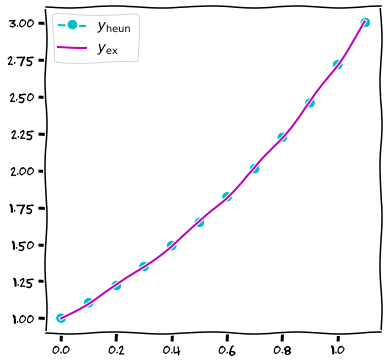

In [7]:
# Define Butcher table for improved Euler
a = np.array([[0,   0],
              [0.5, 0]])
b = np.array([0, 1])
c = np.array([0, 0.5])

# Create a new Runge Kutta solver
rk2 = ExplicitRungeKutta(a, b, c)

t0, T = 0, 1
y0 = 1
lam = 1
Nmax = 10

# rhs of IVP
f = lambda t,y: lam*y

# the solver can be simply called as before, namely as function:
ts, ys = rk2(y0, t0, T, f, Nmax)

plt.figure()
plt.plot(ts, ys, "c--o", label="$y_{\mathrm{impreul}}$")

# Exact solution to compare against
y_ex = lambda t: y0*np.exp(lam*(t-t0))

# Plot the exact solution (will appear in the plot above)
plt.plot(ts, y_ex(ts), "m-", label="$y_{\mathrm{ex}}$")
plt.legend()

# Run an EOC test
Nmax_list = [4, 8, 16, 32, 64, 128]

errs, eocs = compute_eoc(y0, t0, T, f, Nmax_list, rk2, y_ex)
print(errs)
print(eocs)

# Do a pretty print of the tables using panda

import pandas as pd
from IPython.display import display

table = pd.DataFrame({'Error': errs, 'EOC' : eocs})
display(table)

<!-- How does it compare to -->
<!-- Next we compare it to the standard explicit Euler. -->

**Warning.**

For homework assignment 6 problem 1, you need to implement the given Runge-Kutta methods
from scratch, so you are *not allowed* to simply use the `ExplicitRungeKutta` class
with the corresponding Butcher table. You are of course allowed to use this class
as an additional implementation variant and to e.g. compare numerical
results you get with those you obtain using your own implementation.

:::{exercise}: The classical 4-stage Runge-Kutta method

While the term Runge-Kutta methods nowadays refer to the general
scheme defined in Definition [Definition 1: Runge-Kutta methods](#def:runge-kutta), particular schemes
in the "early days" were named by their inventors, and there exists
also the the classical 4-stage Runge-Kutta method which is defined by

$$
\begin{array}{c|cccc}
      0 & 0 & 0 & 0 & 0\\ \frac{1}{2} &  \frac{1}{2} & 0 & 0 & 0\\ \frac{1}{2} & 0 & \frac{1}{2} & 0 & 0\\ 1 &  0 & 0 & 1 & 0 \\ \hline & \frac{1}{6} & \frac{1}{3} & \frac{1}{3} & \frac{1}{6}
    \end{array}
$$

**a)**
Starting from this Butcher table, write down the explicit formulas for computing $k_1,\ldots, k_4$
and $y_{k+1}$.

**b)**
Build a solver based on the classical Runge-Kutta method using the `ExplicitRungeKutta` class
and determine the convergence order experimentally.

:::

:::{note}

For the **explicit** Runge-Kutta methods, the $s\times s$ matrix is in fact just a lower left triangle
matrix, and often, the $0$s in the diagonal and upper right triangle are simply omitted.
So, the Butcher table for the classical Runge-Kutta method reduces to

$$
\begin{array}{c|cccc}
       0 &  &  &  & \\ 
       \frac{1}{2} &  \frac{1}{2} &  &  &
       \\ \frac{1}{2} & 0  & \frac{1}{2} &  &
       \\ 1 & 0  & 0 & 1 &  \\ \hline
       & \frac{1}{6} & \frac{1}{3} & \frac{1}{3} & \frac{1}{6}
    \end{array}
$$

:::

:::{note}

If $f$ depends only on $t$ but not on $y$, the ODE $ y' = f(t, y) = f(t)$
reduces to a simpe integration problem, and in this case
the classical Runge-Kutta methods reduces to the classical Simpson's rule
for numerical integration.

See this [wiki page](https://en.wikipedia.org/wiki/List\_of\_Runge-Kutta\_methods)
for a list of various Runge-Kutta methods.

:::

### Supplemental: Runge-Kutta Methods via Numerical Integration
This section provides a supplemental and more in-depth motivation of how to
arrive at the general concept of Runge-Kutta methods via numerical integration,
similar to the ideas we already presented when we derived Crank-Nicolson, Heun's method
and the explicit trapezoidal rule.

For a given time interval $I_i = [t_i, t_{i+1}]$ we
want to compute $y_{i+1}$ assuming that $y_i$ is given.
Starting from the exact expression

$$
y(t_{i+1}) - y(t_i) = \int_{t_i}^{t_{i+1}} f(t, y(t)){\,\mathrm{d}t},
$$

the idea is now to approximate the integral by some quadrature
rule $\mathrm{Q}[\cdot](\{\xi_j\}_{j=1}^s,\{b_j\}_{j=1}^s)$ defined on $I_i$.
Then we get

$$
y(t_{i+1}) - y(t_i) = \int_{t_i}^{t_{i+1}} f(t, y(t)){\,\mathrm{d}t}
$$

$$
\approx \tau \sum_{j=0}^s b_j f(\xi_j, y(\xi_j))
$$

Now we can define $\{c_j\}_{j=1}^s$ such that  $\xi_j = t_{i} + c_j \tau$
for $j=1,\ldots,s$

:::{exercise} A first condition on $b_j$

**Question:** What value do you expect for $\sum_{j=1}^s b_{j}$?

**Choice A:**
 $\sum_{j=1}^s b_{j} = \tau$

**Choice B:**
 $\sum_{j=1}^s b_{j} = 0$

**Choice C:**
 $\sum_{j=1}^s b_{j} = 1$

:::

In contrast to pure numerical integration, we don't know the values
of $y(\xi_j)$. Again, we could use the same idea to approximate

$$
y(\xi_j) - y(t_i) = \int_{t_i}^{t_i+c_j \tau} f(t, y(t)){\,\mathrm{d}t}
$$

but then again we get a closure problem if we choose new quadrature points.
The idea is now to *not introduce even more new quadrature points* but to
use same $y(\xi_j)$ to avoid the closure problem.
Note that this leads to an approximation of the integrals $\int_{t_i}^{t_i+c_j \tau}$
with possible nodes *outside* of $[t_i, t_i + c_j \tau ]$.

This leads us to

$$
y(\xi_j) - y(t_i) = \int_{t_i}^{t_i+c_j \tau} f(t, y(t)){\,\mathrm{d}t}
$$

$$
\approx c_j \tau \sum_{l=1}^{s}
\tilde{a}_{jl}
f(\xi_l, y(\xi_l))
$$

$$
=
\tau \sum_{l=1}^{s}
{a}_{jl}
f(\xi_l, y(\xi_l))
$$

where we set $ c_j  \tilde{a}_{jl} = a_{jl}$.

:::{exercise} A first condition on $a_{jl}$

**Question:** What value do you expect for $\sum_{l=1}^s a_{jl}$?

**Choice A:**
 $\sum_{l=1}^s a_{jl} =  \tfrac{1}{c_j}$

**Choice B:**
 $\sum_{l=1}^s a_{jl} =  c_j $

**Choice C:**
 $\sum_{l=1}^s a_{jl} =  1 $

**Choice D:**
 $\sum_{l=1}^s a_{jl} =  \tau $

:::

The previous discussion leads to the following alternative but equivalent definition
of Runge-Kutta derivatives via *stages* $Y_j$ (and not stage derivatives $k_j$):

:::{prf:definition} Runge-Kutta methods
:label: ode:def:runge-kutta-meth

Given $b_j$, $c_j$, and $a_{jl}$ for $j,l = 1,\ldots s$, the Runge-Kutta method is
defined by the recipe

\begin{align*}
Y_{j}
&= y_i +  \tau \sum_{l=1}^{s} {a}_{jl}
f(t_i + c_l \tau, Y_l) \quad \text{for } j = 1,\ldots s,
\\
y_{i+1} &= y_i + \tau \sum_{j=1}^s b_j f(t_i + c_j \tau, Y_j)
\end{align*}

:::

Note that in the final step, all the function evaluation we need
to perform have already been performed when computing $Y_j$.

Therefore one often rewrite the scheme by introducing **stage derivatives** $k_l$

$$
k_l
= f(t_i + c_l \tau, Y_l)
$$

$$
 = f(t_i + c_l \tau, y_i +  \tau \sum_{j=1}^{s} {a}_{lj}
k_j) \quad
j = 1,\ldots s,
$$

so the resulting scheme will be (swapping index $l$ and $j$)

$$
k_{j} =
f(t_i + c_j \tau, y_i +  \tau \sum_{l=1}^{s} {a}_{jl} k_l)
\quad
j = 1,\ldots s,
$$

$$
y_{i+1} = y_{i} + \tau \sum_{j=1}^s b_j k_j
$$(eq:rk-final-stage-derivatives)

which is exactly what we used as definition for general Runge-Kutta methods in the
previous section.

### Convergence of Runge-Kutta Methods
The convergence theorem for one-step methods
gave us some necessary conditions to guarantee
that a method is convergent order of $p$:
"consistency order $p$" + "Increment function satisfies a Lipschitz condition"
$\Rightarrow$
"convergence order $p$.

``local truncation error behaves like $\mathcal{O}(\tau^{p+1})$"
+ "Increment function satisfies a Lipschitz condition"
$\Rightarrow$
"global truncation error behaves like $\mathcal{O}(\tau^{p})$"

It turns out that for $f$ is at least $C^1$ with respect to all
its arguments then the increment function $\Phi$
associated with any Runge-Kutta methods satisfies
a Lipschitz condition. The next theorem provides
us a simple way to check whether a given Runge-Kutta
(up to 4 stages) attains a certain consistency order.

:::{prf:theorem} Order conditions for Runge-Kutta methods
:label: thm:rk-order-conditions

Let the right-hand side $f$ of an IVP be of $C^p$.
Then a Runge - Kutta method has consistency order $p$ if and only if all the
conditions up to and including $p$ in the table below are satisfied.

$$
\begin{array}{|c|c|c}
   \hline
   p  & \text{conditions}  \\ \hline 
   1 & \sum_{i=1}^s b_i = 1 \\ \hline 
  2 & \sum_{i=1}^s b_i c_i = 1/2 \\ \hline 
  3 & \sum_{i=1}^s b_i c_i^2 = 1/3\\ 
   & \sum_{i,j=1}^s b_i a_{ij} c_j = 1/6 
  \\ \hline 
  4 & \sum_{i=1}^s b_ic_i^3=1/4 \\ 
  & \sum_{i,j=1}^s b_i c_i a_{ij}c_j=1/8 \\ 
  & \sum_{i,j=1}^s b_i a_{ij}c_j^2=1/12 \\ 
  & \sum_{i,j,k=1}^s b_i a_{ij} a_{jk} c_k = 1/24 \\ \hline 
\end{array}
$$

where sums are taken over all the indices from 1 to $s$.
:::

:::{prf:proof} 
Without proof.
:::

:::{exercise} Applying order conditions to Heun's method
:label: ode:exe-order-cond-heun

Apply the conditions to Heun's method, for which $s=2$ and the Butcher tableau is

$$
\begin{array}{c|cc} 
c_1 & a_{11} & a_{12} \\ c_2 & a_{21} & a_{22} \\ \hline & b_1 & b_2 
\end{array}
=
\begin{array}{c|cc}
0 & 0 & 0 \\ 1 & 1 & 0 \\ \hline & \frac{1}{2} & \frac{1}{2} 
\end{array}.
$$

:::

:::{solution} ode:exe-order-cond-heun

The order conditions are:

\begin{align*}
p&=1 & b_1 + b_2 &= \frac{1}{2} + \frac{1}{2}= 1 && \text{OK} \\ \\ \hline \\ 
p&=2 & b_1c_1 + b_2 c_2 &= \frac{1}{2}\cdot 0 + \frac{1}{2}\cdot 1 = \frac{1}{2} && \text{OK}\\  \\ \hline \\ 
p&=3 & b_1c_1^2 + b_2c_2^2 &= \frac{1}{2}\cdot 0^2 + \frac{1}{2}\cdot 1^2 = \frac{1}{2} \not= \frac{1}{3} && \text{Not satisfied} \\ 
 &   & b_1(a_{11}c_1+a_{12}c_2)+b_2(a_{21}c_1+a_{22}c_2) &= \frac{1}{2}(0\cdot0 + 0\cdot 1) + \frac{1}{2}(1\cdot 0 + 0\cdot 1) \\ 
      &&&= 0 \not=\frac{1}{6} && \text{Not satisfied}
\end{align*}

The method is of order 2.
:::

:::{prf:theorem} Convergence theorem for Runge-Kutta methods
:label: thm:rk-convergence


Given the IVP ${\boldsymbol y}' = {\boldsymbol f}(t, {\boldsymbol y}), {\boldsymbol y}(0) = {\boldsymbol y}_0$.
Assume $f \in C^p$ and that a given Runge-Kutta method satisfies
the order conditions
from {prf:ref}`thm:rk-order-conditions`
up to order $p$.
Then the Runge-Kutta method is convergent of order $p$.

:::

:::{prf:proof}
We only sketch the proof. First, the method has consistency order $p$ thanks to the fullfilment of the order condition, {prf:ref}`thm:rk-order-conditions`. Thus,
we only need to show that the increment function $\Phi$ satisfies a Lipschitz condition.
This can be achieved by employing a similar "bootstrapping" argument we used when proved that the increment function associated with the Heun's method satisfies a Lipschitz condition.
:::